In [2]:
from google.colab import files
uploaded=files.upload()

Saving students.csv to students.csv


In [3]:
import pandas as pd

students=pd.read_csv('students.csv')

print(f'Первые 5 строк:\n{students.head()}')
print('\nИнформация о данных:')
print(students.info())
print(f'\nСтатистика:\n{students.describe()}')
average_score=students['Score'].mean()
student_groups=students['Group'].value_counts()
print(f'\nСредний балл студентов: {average_score:.2f}')
print(f'\nКоличество студентов в каждой группе: {student_groups}')

Первые 5 строк:
                   Name  Age Group  Score
0        Агафья Лыткина   17     A   85.0
1      Венедикт Созонов   18     B   33.0
2     Евлампия Рябинина   19     A   84.0
3  Пантелеймон Кручинин   20     C    NaN
4   Феврония Голубицкая   21     B   88.0

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    24 non-null     object 
 1   Age     24 non-null     int64  
 2   Group   21 non-null     object 
 3   Score   20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes
None

Статистика:
             Age       Score
count  24.000000   20.000000
mean   18.791667   76.700000
std     1.284664   26.630216
min    17.000000   12.000000
25%    18.000000   70.250000
50%    19.000000   84.500000
75%    20.000000   95.250000
max    21.000000  100.000000

Средний балл студентов: 76.70

Количест

In [4]:
import pandas as pd
students=pd.read_csv('students.csv')

highscore=students[students['Score']>80]
highscore_sort=highscore.sort_values('Score',ascending=False)
print(f'Студенты с баллом выше 80 по убыванию:\n{highscore_sort}')
oldest_student=students.loc[students['Age'].idxmax()]
youngest_student=students.loc[students['Age'].idxmin()]
print(f'\nСамый старший студент:\n{oldest_student}')
print(f'\nСамый младший студент:\n{youngest_student}')

Студенты с баллом выше 80 по убыванию:
                   Name  Age Group  Score
23  Фаридушка Джафарова   19     A  100.0
20      Лизочка Пронина   18     A  100.0
21         Мария Учаева   19     A  100.0
22            Полина LL   18     A  100.0
14   Кирасия Оболенская   18     A   96.0
5      Кузьма Пчелинцев   17     A   95.0
19        Еремей Чупров   18   NaN   94.0
9      Ермолай Чистяков   18     B   91.0
4   Феврония Голубицкая   21     B   88.0
0        Агафья Лыткина   17     A   85.0
2     Евлампия Рябинина   19     A   84.0
12     Агриппина Клюева   21     B   84.0
8      Ульяна Журавлёва   20     A   83.0

Самый старший студент:
Name     Феврония Голубицкая
Age                       21
Group                      B
Score                   88.0
Name: 4, dtype: object

Самый младший студент:
Name     Агафья Лыткина
Age                  17
Group                 A
Score              85.0
Name: 0, dtype: object


In [5]:
import pandas as pd
students=pd.read_csv('students.csv')

print(f'Количество пропусков в таблице:\n{students.isnull().sum()}')

average_score=students['Score'].mean()
students['Score']=students['Score'].fillna(average_score)

students=students.dropna(subset=['Group'])

print(f'\nКоличество пропусков в таблице после обновления:\n{students.isnull().sum()}')
print(f'\nТаблица без пропусков:\n{students}')

Количество пропусков в таблице:
Name     0
Age      0
Group    3
Score    4
dtype: int64

Количество пропусков в таблице после обновления:
Name     0
Age      0
Group    0
Score    0
dtype: int64

Таблица без пропусков:
                     Name  Age Group  Score
0          Агафья Лыткина   17     A   85.0
1        Венедикт Созонов   18     B   33.0
2       Евлампия Рябинина   19     A   84.0
3    Пантелеймон Кручинин   20     C   76.7
4     Феврония Голубицкая   21     B   88.0
5        Кузьма Пчелинцев   17     A   95.0
7           Савва Морозов   19     B   72.0
8        Ульяна Журавлёва   20     A   83.0
9        Ермолай Чистяков   18     B   91.0
10     Прасковья Турутина   19     C   52.0
12       Агриппина Клюева   21     B   84.0
13         Фома Трубников   17     C   76.7
14     Кирасия Оболенская   18     A   96.0
15        Лазарь Багрецов   19     B   12.0
16  Златослава Мельникова   20     C   23.0
17           Прохор Гущин   21     A   76.7
18     Феодосия Румянцева   17  

In [6]:
import pandas as pd
students=pd.read_csv('students.csv')

students_by_group=students.groupby('Group')
for group_name,group_data in students_by_group:
    print(f'\nГруппа {group_name}:\n{group_data[["Name","Score"]]}')

average_score_groups=students_by_group['Score'].mean().round(2)
median_age=students_by_group['Age'].median()
print(f'\nСредний балл по группам:\n{average_score_groups}')
print(f'\nМедианный возраст по группам:\n{median_age}')

students['Passed']=students['Score'].apply(lambda x: 1 if x>=60 else 0)
print(f'\nТаблица со столбиком Passed:\n{students}')


Группа A:
                   Name  Score
0        Агафья Лыткина   85.0
2     Евлампия Рябинина   84.0
5      Кузьма Пчелинцев   95.0
8      Ульяна Журавлёва   83.0
14   Кирасия Оболенская   96.0
17         Прохор Гущин    NaN
20      Лизочка Пронина  100.0
21         Мария Учаева  100.0
22            Полина LL  100.0
23  Фаридушка Джафарова  100.0

Группа B:
                   Name  Score
1      Венедикт Созонов   33.0
4   Феврония Голубицкая   88.0
7         Савва Морозов   72.0
9      Ермолай Чистяков   91.0
12     Агриппина Клюева   84.0
15      Лазарь Багрецов   12.0
18   Феодосия Румянцева    NaN

Группа C:
                     Name  Score
3    Пантелеймон Кручинин    NaN
10     Прасковья Турутина   52.0
13         Фома Трубников    NaN
16  Златослава Мельникова   23.0

Средний балл по группам:
Group
A    93.67
B    63.33
C    37.50
Name: Score, dtype: float64

Медианный возраст по группам:
Group
A    18.5
B    19.0
C    19.5
Name: Age, dtype: float64

Таблица со столбиком Passe

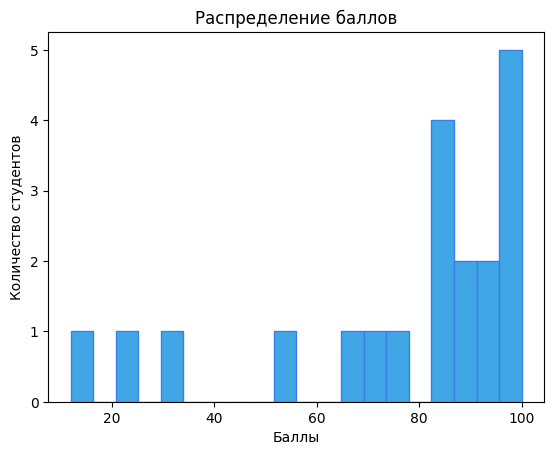

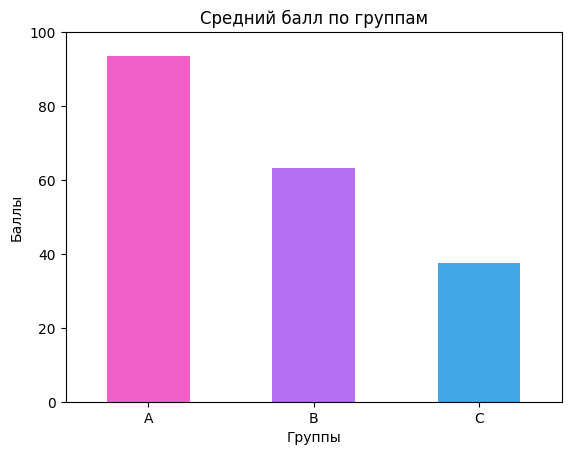

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
students=pd.read_csv('students.csv')

students['Score'].hist(bins=20,color='#40a6e6',edgecolor='#3c7ee8')
plt.title('Распределение баллов')
plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.grid(False)
plt.show()

students_by_group=students.groupby('Group')
average_score_groups=students_by_group['Score'].mean().round(2)
average_score_groups.plot(kind='bar',color=['#f060c9','#b66ef5','#40a6e6'])
plt.title('Средний балл по группам')
plt.xlabel('Группы')
plt.ylabel('Баллы')
plt.xticks(rotation=0)
plt.ylim(0,100)
plt.show()
